# Apparel Recommendations using Convolutional Neural Network

## Get the feature vectors of all apparel images

In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

C:\Users\fsdq-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\fsdq-\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\fsdq-\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\fsdq-\Anaconda3\lib\site-packages\tensorflow\python\framework\

## Get the most similar apparels using euclidean distance measure

In [3]:
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')
asins = list(asins)
data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])

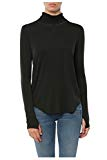

Product Title:  feel piece womens super soft turtleneck curved hem top pine green 260943 
Euclidean Distance from input image: 4.672031e-06
Amazon Url: www.amzon.com/dp/B01MS8J0HE


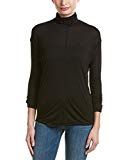

Product Title:  rag  bone womens jean turtleneck tshirt black 
Euclidean Distance from input image: 37.177406
Amazon Url: www.amzon.com/dp/B06XFL819P


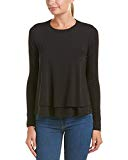

Product Title:  susana monaco womens susana monoco crew neck top xs black 
Euclidean Distance from input image: 38.02619
Amazon Url: www.amzon.com/dp/B0753W3VML


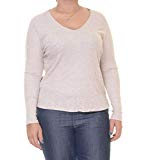

Product Title:  one clothing juniors oatmeal longsleeve thermal tunic xl 
Euclidean Distance from input image: 38.251564
Amazon Url: www.amzon.com/dp/B01N0VTDD6


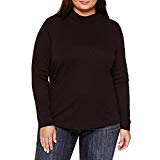

Product Title:  st johns bay mock neck top plus size 2x black 
Euclidean Distance from input image: 38.595085
Amazon Url: www.amzon.com/dp/B06Y47ZWC2


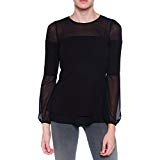

Product Title:  cooper  ella womens zoe blouse black extra small 
Euclidean Distance from input image: 39.48282
Amazon Url: www.amzon.com/dp/B01MRVRUL6


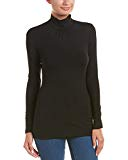

Product Title:  susana monaco womens susana monoco shirred top xs black 
Euclidean Distance from input image: 39.610134
Amazon Url: www.amzon.com/dp/B0753N2FWQ


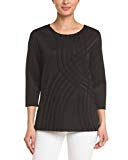

Product Title:  josie natori womens mesh applique spacer xs black 
Euclidean Distance from input image: 39.86178
Amazon Url: www.amzon.com/dp/B01M68JDWQ


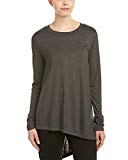

Product Title:  kristy  chloe womens asymmetrical hem tunic xs grey 
Euclidean Distance from input image: 39.928074
Amazon Url: www.amzon.com/dp/B01M2926D0


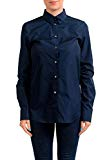

Product Title:  maison margiela 4 navy womens long sleeve button shirt us 40 
Euclidean Distance from input image: 39.955467
Amazon Url: www.amzon.com/dp/B074FYWWZ1


In [7]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(15, 10)